In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from curvemetrics.datafetcher import DataFetcher
import timeit
from datetime import datetime, timedelta
import pandas as pd
import web3
import matplotlib.pyplot as plt
from curvemetrics.datahandler import RawDataHandler
import json
from curvemetrics.queries import queries
import ccxt
from curvemetrics.metrics import *

In [7]:
datahandler = RawDataHandler()
token_metadata = datahandler.get_token_metadata()
pool_metadata = datahandler.get_pool_metadata()

In [8]:
pool = "0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7" # 3pool

In [35]:
metrics_token_df = metrics_for_token("0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48", datahandler, token_metadata)
metrics_token_df

OSError: Cannot save file into a non-existent directory: 'tmpdata'

In [26]:
metrics_df = metrics_for_pool(pool, datahandler, pool_metadata, token_metadata)
metrics_df

,giniCoefficient,shannonsEntropy,DAI.netSwapFlow,DAI.netLPFlow,USDC.netSwapFlow,USDC.netLPFlow,USDT.netSwapFlow,USDT.netLPFlow
2023-03-01 00:00:00,0.054215,1.577162,0.0,0,0.0,0.0,0.0,0.0
2023-03-01 00:01:00,0.052899,1.577547,0.0,0,0.0,0.0,0.0,0.0
2023-03-01 00:02:00,0.052228,1.577747,0.0,0,0.0,0.0,0.0,0.0
2023-03-01 00:03:00,0.053584,1.577345,0.0,0,0.0,0.0,0.0,0.0
2023-03-01 00:04:00,0.052228,1.577747,0.0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-03-28 23:56:00,0.115890,1.545968,0.0,0,0.0,0.0,0.0,0.0
2023-03-28 23:57:00,0.115891,1.545967,0.0,0,0.0,0.0,0.0,0.0
2023-03-28 23:58:00,0.115832,1.545907,0.0,0,0.0,0.0,0.0,0.0
2023-03-28 23:59:00,0.115741,1.545821,0.0,0,0.0,0.0,0.0,0.0


In [15]:
pool_data = datahandler.get_pool_data(pool)
swaps_data = datahandler.get_swaps_data(pool)
lp_data = datahandler.get_lp_data(pool)

<Axes: xlabel='timestamp'>

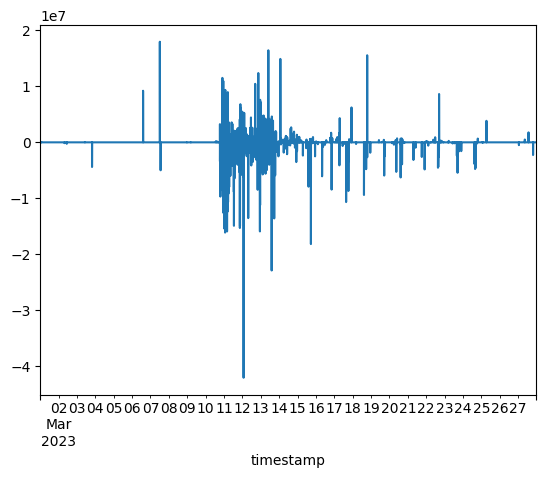

In [25]:
gini_data = gini(pool_data)
shannon_data = shannons_entropy(pool_data)

metrics = []

for token_idx, token_id in enumerate(pool_metadata[pool]['coins']):
    token_ohlcv = datahandler.get_ohlcv_data(token_id)
    metrics.append(net_swap_flow(swaps_data, token_id, token_metadata[token_id]['symbol']))
    metrics.append(net_lp_flow(lp_data, token_idx, token_metadata[token_id]['symbol']))
    metrics.append(log_returns(token_ohlcv, token_metadata[token_id]['symbol']))
metrics_df = pd.concat(metrics, axis=1)
metrics_df = metrics_df.fillna(0)

In [104]:
metrics_df

,giniCoefficient,shannonsEntropy,DAI.netSwapFlow,USDC.netSwapFlow,USDT.netSwapFlow,DAI.netLPFlow,USDC.netLPFlow,USDT.netLPFlow,DAI.logReturns,USDC.logReturns,USDT.logReturns
2023-03-10 00:00:00,0.063709,1.573687,0.000000,0.0000,0.00000,0.0,0.0,0.0,0.000000,0.0000,0.0
2023-03-10 00:01:00,0.063601,1.573742,149886.959338,-151891.9253,1992.02007,0.0,0.0,0.0,0.007414,0.0007,0.0
2023-03-10 00:02:00,0.063601,1.573742,0.000000,0.0000,0.00000,0.0,0.0,0.0,0.000000,0.0008,0.0
2023-03-10 00:03:00,0.063601,1.573742,0.000000,0.0000,0.00000,0.0,0.0,0.0,0.000000,0.0000,0.0
2023-03-10 00:04:00,0.064507,1.573233,0.000000,0.0000,0.00000,0.0,0.0,0.0,0.000000,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-10 16:36:00,0.000000,0.000000,0.000000,0.0000,0.00000,0.0,0.0,0.0,-0.011722,0.0000,0.0
2023-03-10 16:37:00,0.000000,0.000000,0.000000,0.0000,0.00000,0.0,0.0,0.0,0.000000,0.0000,0.0
2023-03-10 16:38:00,0.000000,0.000000,0.000000,0.0000,0.00000,0.0,0.0,0.0,0.000000,0.0000,0.0
2023-03-10 16:39:00,0.000000,0.000000,0.000000,0.0000,0.00000,0.0,0.0,0.0,0.000000,-0.0008,0.0


<Axes: >

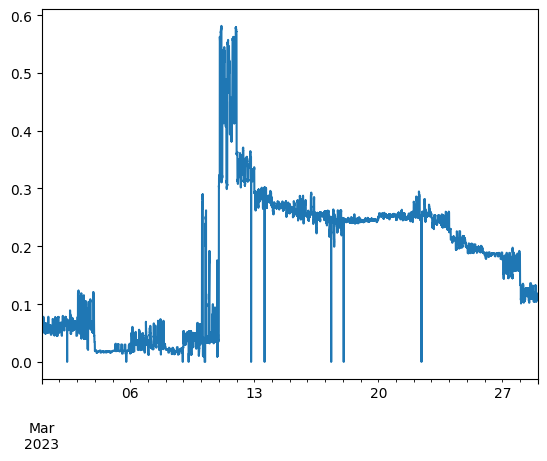

In [33]:
metrics_df['giniCoefficient'].plot()

In [4]:
STEP_SIZE = 10 # NOTE: increasing this risks losing txs, 10 is probably safe
start = datetime(2023, 3, 10)
start_timestamp, start_block = DataFetcher.get_block(start)
end = datetime(2023, 3, 10, 1)
end_timestamp, end_block = DataFetcher.get_block(end)

datafetcher = DataFetcher(token_metadata=token_metadata)

pool = '0xceaf7747579696a2f0bb206a14210e3c9e6fb269'
token = '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48'

In [100]:
token_data = datafetcher.get_ohlcv(start_timestamp, end_timestamp, token)
pool_data = datafetcher.get_pool_data(start_block, end_block, pool, step_size=1)
swaps_data = datafetcher.get_swaps_data(start_block, end_block, pool, step_size=STEP_SIZE)
lp_data = datafetcher.get_lp_data(start_block, end_block, pool, step_size=STEP_SIZE)

Fetching OHLCV for USDC/USD using Binance US...
Fetching OHLCV for USDC/USD using Binance US...


In [80]:
token_data_df = RawDataHandler.format_token_data(token_data)
pool_df = RawDataHandler.format_pool_data(pool_data, datafetcher.start_timestamp, datafetcher.end_timestamp)
swaps_df = RawDataHandler.format_swaps_data(swaps_data)
lp_df = RawDataHandler.format_lp_data(lp_data)

In [45]:
for exchange_id in ccxt.exchanges:
    exchange = getattr(ccxt, exchange_id)()
    try:
        exchange.load_markets()
        for market in exchange.markets.keys():
            if "USDN" in market:
                print(f'{exchange_id}, {market}')
    except Exception as e:
        print(f'{exchange_id}, failed.')

binance, failed.
binancecoinm, failed.
binanceusdm, failed.
bitflyer, failed.
bittrex, USDN/BTC
bittrex, USDN/USDT
coinbase, failed.
gate, USDN/USDT
gateio, USDN/USDT
hitbtc, USDN/USDT
hitbtc3, USDN/USDT
kuna, failed.
mexc, USDN/USDT
mexc3, USDN/USDT
okcoin, failed.
tidex, failed.
tokocrypto, failed.


# Missing Txs
We show that if you increase the step_size between block_gte and block_lt you start losing transactions because theGraph has a rate limit of 100 rows per response.

In [ ]:
start = datetime(2023, 3, 11)
end = datetime(2023, 3, 13)
datafetcher = DataFetcher(start, end)
_3pool = '0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7'

In [ ]:
swaps_data_1 = datafetcher.get_swaps_data('3pool', step_size=1)
swaps_data_10 = datafetcher.get_swaps_data('3pool', step_size=10)
swaps_data_50 = datafetcher.get_swaps_data('3pool', step_size=50)
swaps_data_100 = datafetcher.get_swaps_data('3pool', step_size=100)

swaps_df_1 = RawDataHandler.format_swaps_data(swaps_data_1)
swaps_df_10 = RawDataHandler.format_swaps_data(swaps_data_10)
swaps_df_50 = RawDataHandler.format_swaps_data(swaps_data_50)
swaps_df_100 = RawDataHandler.format_swaps_data(swaps_data_100)

print(swaps_df_1.shape)
print(swaps_df_10.shape)
print(swaps_df_50.shape)
print(swaps_df_100.shape)

In [59]:
missing = set(swaps_df_10['id']) - set(swaps_df_100['id'])
missing_eg = missing.pop()
swaps_df_10[swaps_df_10['id']==missing_eg]

,id,amountBought,amountSold,block,buyer,gasLimit,gasUsed,isUnderlying,timestamp,tokenBought,tokenSold,tx,pool_id,block_gte,block_lt
16058,0xdc50a0d779d4c5792f32e1a9a5ba2914f58aa654bb79...,340929.942491,331341.859263,16804730,0xdecf04ca46d287b3cb99692ad512e568ba276140,601141,360441,0,1678536347,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x6b175474e89094c44da98b954eedeac495271d0f,0xdc50a0d779d4c5792f32e1a9a5ba2914f58aa654bb79...,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16804724,16804734


In [78]:
CURVE_SUBGRAPH_URL_CVX = 'https://api.thegraph.com/subgraphs/name/convex-community/curve-mainnet'
block = 16804725
query = queries['swapEvents']
kwargs = {'pool_id':'0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7', 'block_gte':block, 'block_lt':block+40}
out = await datafetcher.execute_query_async(query, 'swapEvents', CURVE_SUBGRAPH_URL_CVX, **kwargs)
out_df = RawDataHandler.format_swaps_data([out])
print(len(out_df))
# out_df[out_df['id'] == '0xdc50a0d779d4c5792f32e1a9a5ba2914f58aa654bb79ad59d0daf319692bac5b-340929.942491-131']

89


In [45]:
CURVE_SUBGRAPH_URL_CVX = 'https://api.thegraph.com/subgraphs/name/convex-community/curve-mainnet'
query = queries['swapEvents']
kwargs = {'pool_id':'0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7', 'block_gte':16804686, 'block_lt':16804735}
out = await datafetcher.execute_query_async(query, 'swapEvents', CURVE_SUBGRAPH_URL_CVX, **kwargs)
out_df = RawDataHandler.format_swaps_data([out])
out_df[out_df['id'] == '0xdc50a0d779d4c5792f32e1a9a5ba2914f58aa654bb79ad59d0daf319692bac5b-340929.942491-131']

,id,amountBought,amountSold,block,buyer,gasLimit,gasUsed,isUnderlying,timestamp,tokenBought,tokenSold,tx,pool_id,block_gte,block_lt
